In [1]:
## Clustering using K-means method
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords

import glob
import re
import spacy
import matplotlib.pyplot as plt

In [2]:
# Read the CSV.file
df=pd.read_csv('preprocess1.csv')
#df.head()

In [3]:
# Round1: Remove the emoji
df['Round1']=df['Translated'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

/var/folders/lv/fc005q_d2fx0299s750b5vw00000gn/T/ipykernel_2477/1366370625.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Round1']=df['Translated'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)


In [4]:
# Round2: Remove punctuation: "," , "'", "..."
df['Round2']=df['Round1'].str.replace('[^\w\s]','')
#print(df['Round2'])

/var/folders/lv/fc005q_d2fx0299s750b5vw00000gn/T/ipykernel_2477/588299801.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Round2']=df['Round1'].str.replace('[^\w\s]','')


In [5]:
# Round3: We lowercase the capitalized words
df ['Round3']= df['Round2'].str.lower()
#print (df['Round3'])

In [6]:
stop_words = stopwords.words('english')
allow_postags = set(['NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'])
nlp = spacy.load('en_core_web_sm')

In [7]:
# Round4: Remove stopwords and lemmatization 
txt2=list(df['Round3'])
join_words_list=[]
for element in txt2:
    words=nlp(element)
    words_list=[]
    for token in words:
        if token.text not in stop_words and token.pos_ in allow_postags:
            words_list.append(token.lemma_)
    for word in words_list:
        join_words =' '.join(words_list)
    join_words_list.append(join_words)

df['Round4']=join_words_list

In [8]:
# Select Date, User, Round4 to make a new dataframe
df_clean = df[['Date','User','Round4']]
descriptions = df_clean['Round4']

In [10]:
# Vectorization using tf-idf
# Term frequency–inverse document frequency, 
# is a numerical statistic that is intended to reflect 
# how important a word is to a document in a collection or corpus.
# how to calculate?
# the frequency of one word appears in one document multiplies LOG(the frequency of the document that contains that word appears in all of the documents)

vectorizer = TfidfVectorizer(
                            
                                max_features=200,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3)
                    

                            )

In [11]:
tfidf = vectorizer.fit_transform(df['Round4'])

In [12]:
words_df = pd.DataFrame(tfidf.toarray(),
                        columns=vectorizer.get_feature_names_out())
words_df

,able,able go,afraid,afraid corona,aftereffect,already,also,anonymous,anonymous question,anonymous question answer,...,want go,watch,way,week,well,wonder,work,worried,year,yesterday
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.176865,0.000000
1,0.191404,0.000000,0.000000,0.000000,0.0,0.000000,0.215416,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.147842,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.252671,0.0,0.00000,0.208895,0.0,0.0,0.154933,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.088066,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.000000,0.000000,0.0,0.364803,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
196,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.28559,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.364926
197,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.520460,0.000000
198,0.207730,0.270074,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.239495,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


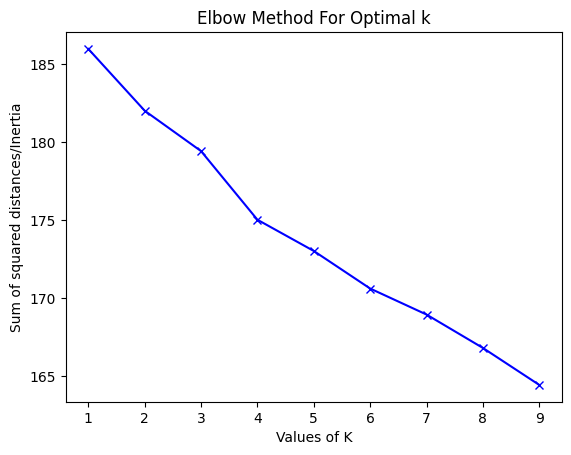

In [18]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(words_df)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()